## Load packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [8]:
song_data = pd.read_csv('../data/training_data.csv',na_values='?', dtype={'ID': str}).dropna()
song_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
 13  label             750 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 87.9 KB


**observation:** It seems the data is clean, but the training data is very limited, so in the later training, we need to consider use k-Fold validation.

In [9]:
song_data

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.88500,0.366,352000,0.1390,0.913000,7,0.0725,-19.978,1,0.0390,139.478,4,0.310,1
1,0.12400,0.863,236293,0.5760,0.000000,5,0.1430,-5.687,0,0.2390,132.054,4,0.832,0
2,0.18400,0.631,219160,0.6990,0.000000,9,0.1080,-7.625,0,0.0284,128.433,4,0.707,1
3,0.01080,0.800,201840,0.8940,0.437000,6,0.0285,-7.346,0,0.0400,138.480,4,0.967,0
4,0.00440,0.788,228000,0.6730,0.000005,9,0.0755,-9.232,1,0.1990,99.979,4,0.478,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.82300,0.635,89067,0.3380,0.000434,9,0.2210,-8.078,1,0.5120,168.163,3,0.736,0
746,0.03250,0.544,238493,0.5000,0.000004,11,0.1090,-8.253,1,0.0260,93.621,4,0.177,1
747,0.99200,0.525,226293,0.0633,0.905000,9,0.1050,-23.072,1,0.0497,71.855,4,0.297,1
748,0.54500,0.365,237267,0.5200,0.000000,9,0.1110,-6.520,1,0.0331,106.152,4,0.400,1


## Correlation 

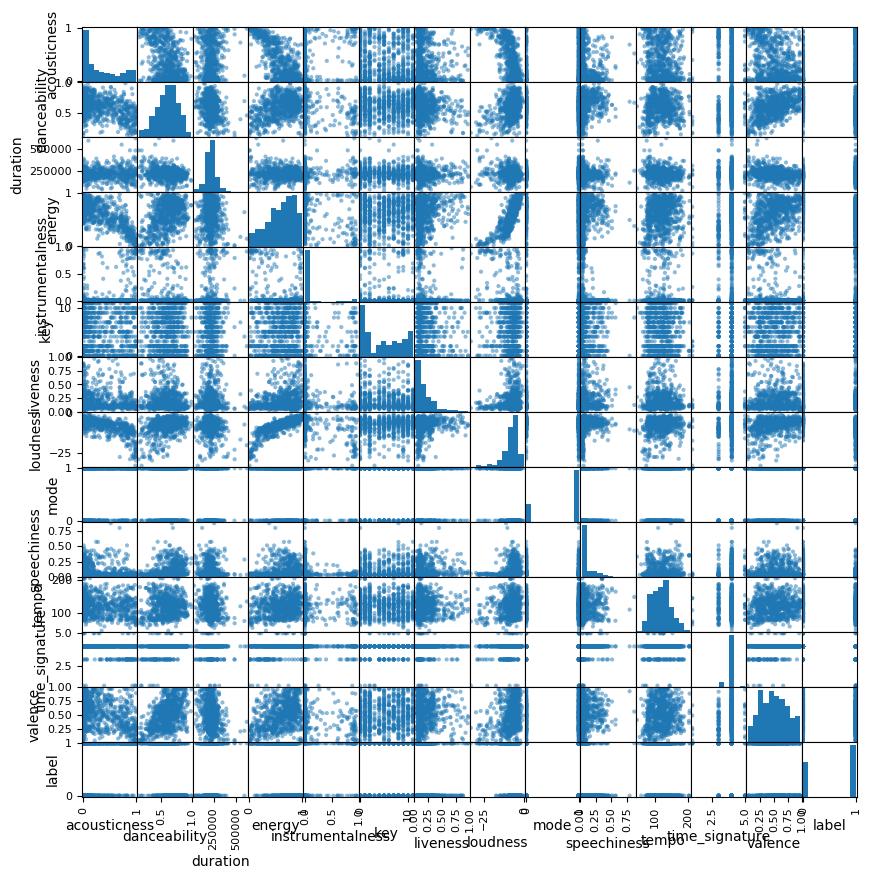

In [10]:
pd.plotting.scatter_matrix(song_data, figsize = (10,10))
plt.show()

In [22]:
song_data.corr()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
acousticness,1.000000,-0.426793,0.042703,-0.771265,0.329009,-0.068101,-0.123512,-0.684040,0.109343,-0.211553,-0.146647,-0.244286,-0.264162,0.459151
danceability,-0.426793,1.000000,-0.246220,0.388466,-0.247306,0.028109,-0.120421,0.392318,-0.055700,0.277556,0.072492,0.273686,0.482284,-0.365389
duration,0.042703,-0.246220,1.000000,-0.068901,0.114009,0.042249,-0.002234,-0.120319,-0.023736,-0.094441,-0.108621,-0.012212,-0.239606,0.121365
energy,-0.771265,0.388466,-0.068901,1.000000,-0.285541,0.068721,0.243633,0.818155,-0.099907,0.169796,0.171067,0.268790,0.409555,-0.442860
instrumentalness,0.329009,-0.247306,0.114009,-0.285541,1.000000,-0.051761,-0.071634,-0.475180,-0.004200,-0.151462,-0.064900,-0.096660,-0.223484,0.136434
key,-0.068101,0.028109,0.042249,0.068721,-0.051761,1.000000,-0.070804,0.023270,-0.132482,0.062079,-0.043271,0.097862,0.063650,-0.042763
liveness,-0.123512,-0.120421,-0.002234,0.243633,-0.071634,-0.070804,1.000000,0.173152,-0.037246,0.113004,-0.027347,0.027452,0.064986,-0.142284
loudness,-0.684040,0.392318,-0.120319,0.818155,-0.475180,0.023270,0.173152,1.000000,-0.076997,0.173760,0.157242,0.231976,0.297878,-0.399617
mode,0.109343,-0.055700,-0.023736,-0.099907,-0.004200,-0.132482,-0.037246,-0.076997,1.000000,-0.116471,0.005051,-0.045203,0.068248,0.089219
speechiness,-0.211553,0.277556,-0.094441,0.169796,-0.151462,0.062079,0.113004,0.173760,-0.116471,1.000000,0.096851,0.089559,0.103731,-0.476312


In [25]:
columns = song_data.columns
for column in columns:
    display(song_data.corr()[column].sort_values())

energy             -0.771265
loudness           -0.684040
danceability       -0.426793
valence            -0.264162
time_signature     -0.244286
speechiness        -0.211553
tempo              -0.146647
liveness           -0.123512
key                -0.068101
duration            0.042703
mode                0.109343
instrumentalness    0.329009
label               0.459151
acousticness        1.000000
Name: acousticness, dtype: float64

acousticness       -0.426793
label              -0.365389
instrumentalness   -0.247306
duration           -0.246220
liveness           -0.120421
mode               -0.055700
key                 0.028109
tempo               0.072492
time_signature      0.273686
speechiness         0.277556
energy              0.388466
loudness            0.392318
valence             0.482284
danceability        1.000000
Name: danceability, dtype: float64

danceability       -0.246220
valence            -0.239606
loudness           -0.120319
tempo              -0.108621
speechiness        -0.094441
energy             -0.068901
mode               -0.023736
time_signature     -0.012212
liveness           -0.002234
key                 0.042249
acousticness        0.042703
instrumentalness    0.114009
label               0.121365
duration            1.000000
Name: duration, dtype: float64

acousticness       -0.771265
label              -0.442860
instrumentalness   -0.285541
mode               -0.099907
duration           -0.068901
key                 0.068721
speechiness         0.169796
tempo               0.171067
liveness            0.243633
time_signature      0.268790
danceability        0.388466
valence             0.409555
loudness            0.818155
energy              1.000000
Name: energy, dtype: float64

loudness           -0.475180
energy             -0.285541
danceability       -0.247306
valence            -0.223484
speechiness        -0.151462
time_signature     -0.096660
liveness           -0.071634
tempo              -0.064900
key                -0.051761
mode               -0.004200
duration            0.114009
label               0.136434
acousticness        0.329009
instrumentalness    1.000000
Name: instrumentalness, dtype: float64

mode               -0.132482
liveness           -0.070804
acousticness       -0.068101
instrumentalness   -0.051761
tempo              -0.043271
label              -0.042763
loudness            0.023270
danceability        0.028109
duration            0.042249
speechiness         0.062079
valence             0.063650
energy              0.068721
time_signature      0.097862
key                 1.000000
Name: key, dtype: float64

label              -0.142284
acousticness       -0.123512
danceability       -0.120421
instrumentalness   -0.071634
key                -0.070804
mode               -0.037246
tempo              -0.027347
duration           -0.002234
time_signature      0.027452
valence             0.064986
speechiness         0.113004
loudness            0.173152
energy              0.243633
liveness            1.000000
Name: liveness, dtype: float64

acousticness       -0.684040
instrumentalness   -0.475180
label              -0.399617
duration           -0.120319
mode               -0.076997
key                 0.023270
tempo               0.157242
liveness            0.173152
speechiness         0.173760
time_signature      0.231976
valence             0.297878
danceability        0.392318
energy              0.818155
loudness            1.000000
Name: loudness, dtype: float64

key                -0.132482
speechiness        -0.116471
energy             -0.099907
loudness           -0.076997
danceability       -0.055700
time_signature     -0.045203
liveness           -0.037246
duration           -0.023736
instrumentalness   -0.004200
tempo               0.005051
valence             0.068248
label               0.089219
acousticness        0.109343
mode                1.000000
Name: mode, dtype: float64

label              -0.476312
acousticness       -0.211553
instrumentalness   -0.151462
mode               -0.116471
duration           -0.094441
key                 0.062079
time_signature      0.089559
tempo               0.096851
valence             0.103731
liveness            0.113004
energy              0.169796
loudness            0.173760
danceability        0.277556
speechiness         1.000000
Name: speechiness, dtype: float64

acousticness       -0.146647
duration           -0.108621
label              -0.071761
instrumentalness   -0.064900
key                -0.043271
liveness           -0.027347
mode                0.005051
time_signature      0.019914
danceability        0.072492
speechiness         0.096851
valence             0.099824
loudness            0.157242
energy              0.171067
tempo               1.000000
Name: tempo, dtype: float64

acousticness       -0.244286
label              -0.173349
instrumentalness   -0.096660
mode               -0.045203
duration           -0.012212
tempo               0.019914
liveness            0.027452
speechiness         0.089559
key                 0.097862
valence             0.173242
loudness            0.231976
energy              0.268790
danceability        0.273686
time_signature      1.000000
Name: time_signature, dtype: float64

acousticness       -0.264162
duration           -0.239606
instrumentalness   -0.223484
label              -0.194989
key                 0.063650
liveness            0.064986
mode                0.068248
tempo               0.099824
speechiness         0.103731
time_signature      0.173242
loudness            0.297878
energy              0.409555
danceability        0.482284
valence             1.000000
Name: valence, dtype: float64

speechiness        -0.476312
energy             -0.442860
loudness           -0.399617
danceability       -0.365389
valence            -0.194989
time_signature     -0.173349
liveness           -0.142284
tempo              -0.071761
key                -0.042763
mode                0.089219
duration            0.121365
instrumentalness    0.136434
acousticness        0.459151
label               1.000000
Name: label, dtype: float64